In [5]:
#Downloading dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
#Unzipping the dataset file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
#Importing libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AveragePooling2D,Activation, Dropout, Flatten, Dense, GaussianNoise, GlobalMaxPooling2D
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [8]:
#Loading the images
x_train= keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=100,
    image_size=(256,256)
)

x_test= keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=100,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [9]:
#Defining class names
class_names = x_train.class_names
class_names

['cats', 'dogs']

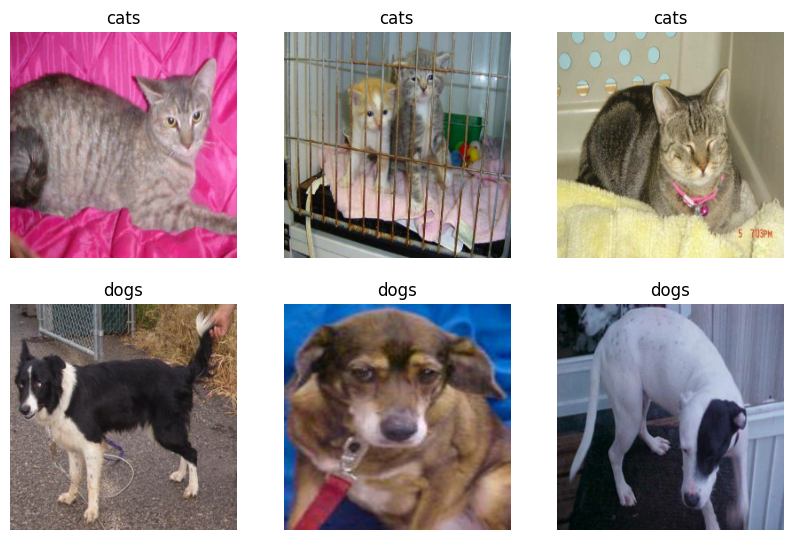

In [10]:
# Displaying a few sample images from train
plt.figure(figsize=(10, 10))
for images, labels in x_train.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

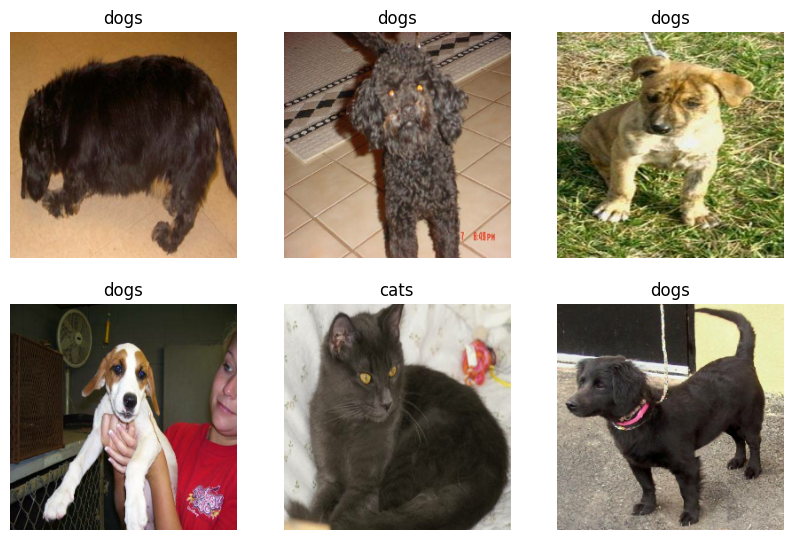

In [11]:
# Displaying a few sample images from test
plt.figure(figsize=(10, 10))
for images, labels in x_test.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [12]:
# Normalizing the images
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

x_train = x_train.map(process)
x_test = x_test.map(process)

In [13]:
input_shape = (256, 256, 3)

In [14]:
#model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(GaussianNoise(0.1))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.1))
model.add(AveragePooling2D(pool_size=(2, 2),strides=2,padding='valid'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2),strides=2,padding='valid'))
model.add(Dropout(0.25))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 gaussian_noise (GaussianNoi  (None, 254, 254, 32)     0         
 se)                                                             
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                        

In [16]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
from tensorflow.keras.models import load_model
model.save("cvd.h5")

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
model = tf.keras.models.load_model('/content/drive/MyDrive/cvd.h5')

In [20]:
model.evaluate(x_test)

200/200 [==============================] - 1311s 7s/step - loss: 0.7127 - accuracy: 0.5063


[0.7126902937889099, 0.5062999725341797]

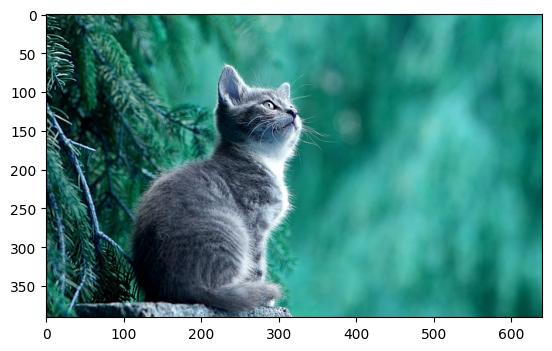

In [43]:
# Load an X-ray image for testing
image_path = "/content/Cat.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (256, 256))
normalized_image = resized_image / 255.0
input_image = np.expand_dims(normalized_image, axis=0)

test_img = cv2.imread(image_path)
plt.imshow(test_img)

In [44]:
#Making prediction
prediction = model.predict(input_image)[0]
dog = prediction >= 0.5
if dog:
    print("Dog")
else:
    print("Cat")

1/1 [==============================] - 0s 67ms/step
Cat
